# Multiple Linear Regression with scikit-learn

In [4]:
url = 'https://raw.githubusercontent.com/vogdb/data-science-machine-learning-playground/master/Mipt-Yandex/month2/homework/week1/advertising.csv'

# Task 1: Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

# Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.


In [8]:
advert = pd.read_csv(url)
advert.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


# Task 3: Relationship between Features and Response

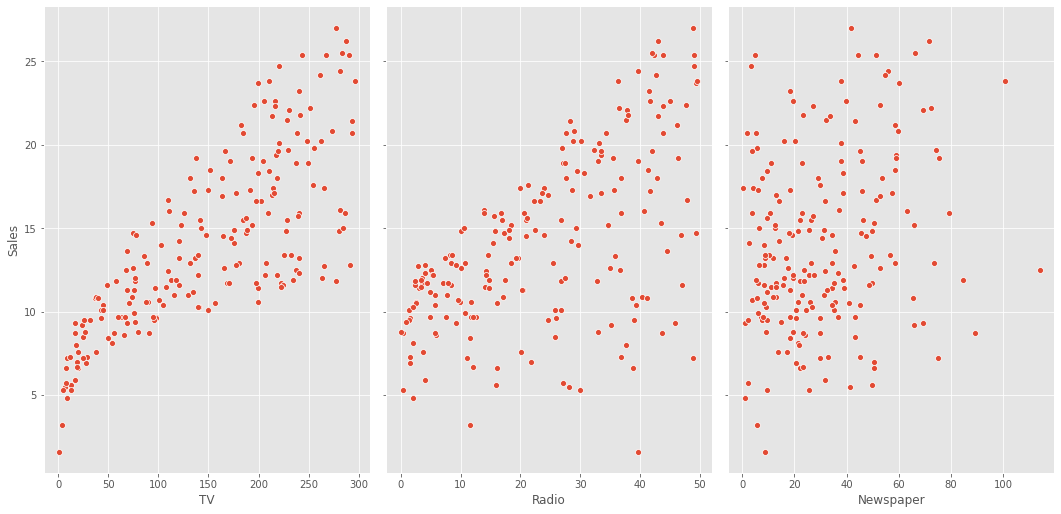

In [13]:
sns.pairplot(advert,x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales',height=7,aspect=0.7)

# Task 4: Multiple Linear Regression - Estimating Coefficients

In [24]:
from sklearn.linear_model import LinearRegression
X=advert[['TV', 'Radio', 'Newspaper']]
y=advert['Sales']

lm1 = LinearRegression()
lm1.fit(X,y)

LinearRegression()

In [26]:
print(lm1.intercept_)
print(lm1.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [30]:
list(zip(['TV', 'Radio', 'Newspaper'],lm1.coef_))

[('TV', 0.04576464545539759),
 ('Radio', 0.1885300169182046),
 ('Newspaper', -0.0010374930424762452)]

In [28]:
advert.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

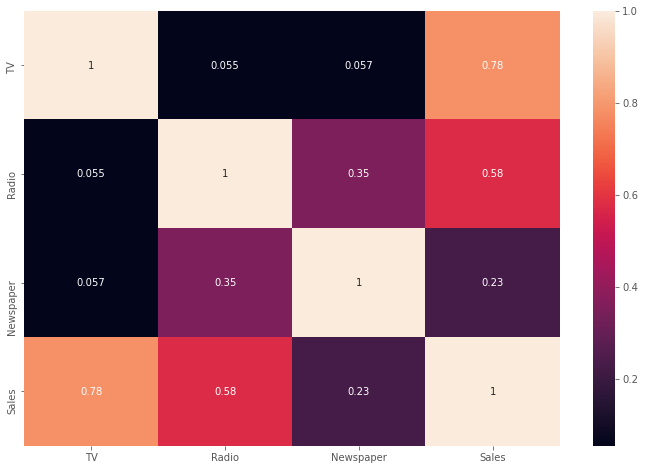

In [31]:
sns.heatmap(advert.corr(),annot=True)

# Task 5: Feature Selection

In [39]:
from sklearn.metrics  import r2_score
lm2 = LinearRegression().fit(X[['TV', 'Radio', 'Newspaper']],y)
lm2_pred = lm2.predict(X[['TV', 'Radio', 'Newspaper']])
r2_score(y,lm2_pred)

0.8972106381789521

In [40]:
lm3 = LinearRegression().fit(X[['TV', 'Radio', 'Newspaper']],y)
lm3_pred = lm3.predict(X[['TV', 'Radio', 'Newspaper']])
r2_score(y,lm3_pred)

0.8972106381789521

In [38]:
r2_score(y,lm2_pred)

0.8972106381789521

# Task 6: Model Evaluation Using Train/Test Split and Metrics

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=advert[['TV', 'Radio', 'Newspaper']]
y=advert.Sales
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

lm4=LinearRegression().fit(X_train,y_train)
lm4_pred=lm4.predict(X_test)
print("RMSE ", np.sqrt(mean_squared_error(y_test,lm4_pred)) )
print(r2_score(y_test,lm4_pred))

RMSE  1.4046514230328953
0.9156213613792232


In [83]:
X=advert[['TV', 'Radio']]
y=advert.Sales
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

lm5=LinearRegression().fit(X_train,y_train)
lm5_pred=lm5.predict(X_test)
print("RMSE ", np.sqrt(mean_squared_error(y_test,lm5_pred)) )
print(r2_score(y_test,lm5_pred))


RMSE  1.3879034699382886
0.9176214942248908


In [70]:
# !pip install yellowbrick

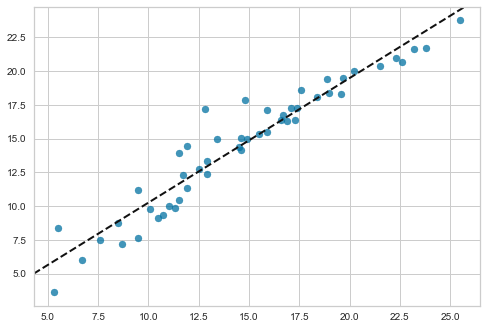

In [75]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm5).fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof;

In [77]:
visualizer.score(X_test,y_test)

0.9176214942248908

# Task 7: Interaction Effect (Synergy)

In [85]:
advert['interaction']=advert['TV']*advert['Radio']

X=advert[['TV', 'Radio', 'interaction']]
y=advert.Sales

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

lm6=LinearRegression().fit(X_train,y_train)
lm6_pred=lm6.predict(X_test)
print("RMSE ", np.sqrt(mean_squared_error(y_test,lm6_pred)) )
print(r2_score(y_test,lm6_pred))

RMSE  0.7011871137164334
0.978973681468126


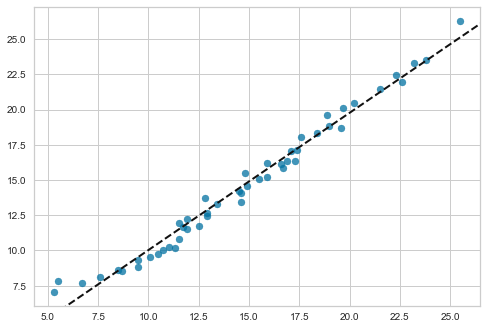

In [86]:
visualizer = PredictionError(lm6).fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof;